In [1]:
# Here are all the packages and functions you need
# However feel free to import new ones 

import numpy as np
import pandas as pd
import scipy.stats as sp

import matplotlib.pyplot as plt



**Authors: Cole Pendergraft, Zac Cross, Elliott Freeman, Arden Butterfield**

**Problem 1: Difference in sample proportions**

For this problem you will:
1.    Design a function that will take two proportions $\hat{p}_A$ and $\hat{p}_B$, the sample sizes $n_A$ and $n_B$, along with the population size $N_A$ and $N_B$. Your function needs to check if the standart deviation formula for $ \hat{p}_A - \hat{p}_B $ is appropriate to use. Given a positive answer on this check your function describe the distribution of $ \hat{p}_A - \hat{p}_B $ in terms of its *mean*, *standart deviation*, and *shape*.

> Before you code your function list (using words and formulas) all the conditions that will determine the independence of samples from each population and the conditions that will determine that the distripution of $\hat{p}_A- \hat{p}_B$ is Gaussian. 



2.   Once you have the function written, apply it to the following problem: 


> Suppose that $11\%$ of all cars produced by manifacturer $A$ have a ceratin defect and $8\%$ of all cars produced by manifacturer $B$ have this defect. Each month, a you, as a quality control manager takes separate random samples of $500$ of the $4500$ produced cars from each plant. You than consider the difference between the proportions of cars with the defect in each sample, i.e. $ \hat{p}_A - \hat{p}_B $. 
*   Describe the distribution of $ \hat{p}_A - \hat{p}_B $ in terms of its *mean*, *standart deviation*, and *shape*.
*   If the shape is Gaussian, plot the probability distribution functions with the computed quantities 








In [6]:
# Problem 1: Difference in sample proportions
# Your solution goes here

def megatron(pa, pb, na, nb, Na, Nb, alpha, title):
    ret = False
    
    if(na >= 0.1*Na) and (nb >= 0.1*Nb):
        if(pa*na >= 10) and (pb*nb >= 10):
            
            ret= True
            
            diff = pa-pb
            
            xa = pa*na
            xb = pb*nb
            
            xc = xa + xb
            nc = na + nb
            pc = xc/nc

            se = np.sqrt(pc*(1 - pc)*(1/na + 1/nb))
            z = diff/se
            
            hippo_rejected = False
            if (z < 0) and (2 * sp.norm.cdf(z) < alpha):
                hippo_rejected = True
                
            elif (z > 0) and (2 * (1 - sp.norm.cdf(z)) < alpha):
                hippo_rejected = True

            print("Mean:", diff)
            print("Standard deviation:", se)
            print("The shape is gaussian")
            print("Reject the null hypothesis?", hippo_rejected)
            
            x_range = np.arange(-5,-abs(z), .001) #this is what we're going to shade under
            x_range2 = np.arange( abs(z),5, .001) #this is what we're going to shade under
            x_all = np.arange(-5,5, .001) # entire range of x,

            y = sp.norm.pdf(x_range,0,1)

            y2 = sp.norm.pdf(x_all,0,1)
            y3 = sp.norm.pdf(x_range2,0,1)
            fig, ax = plt.subplots(figsize=(9,6))
            plt.style.use('fivethirtyeight')
            ax.plot(x_all,y2)

            ax.fill_between(x_range,y,0, alpha=0.3, color='b')
            ax.fill_between(x_all,y2,0, alpha=0.1)
            ax.fill_between(x_range2,y3,0, alpha=0.3, color='b')
            ax.set_xlim([-5,5])
            ax.set_xlabel('Z region shaded')

            ax.set_yticklabels([])

            ax.set_title(f"{title}")

            plt.show()
            
        else:
            print("There is not a big enough sample for this to be gaussian, plot it yourself")
    else:
        print("Sample is not the correct proportion of the population and cannot be used")

    return ret

Mean: 0.03
Standard deviation: 0.01854454097571574
The shape is gaussian
Reject the null hypothesis? False


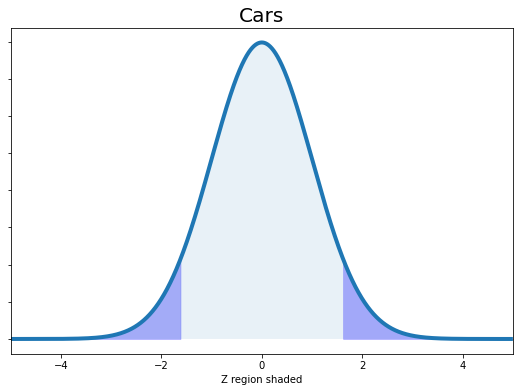

True

In [3]:
megatron(0.11, 0.08, 500, 500, 4500, 4500, 0.01, 'Cars')

$$
\chi^2 = \sum{\frac{(observed-expected)^2}{expected}}
$$ 
 \\
 \\



**Problem 2:  $\chi^2_{df}$ test: goodness of fit**

Assume that you want to buy a restaurant and your major point of concern is the daily influx of people that get dinner at the restaurant.  You have asked the current owner to give you the information about the influx of customers and he provided the following data:

Mon - $10 \%$ of weekly customers \\
Tue - $8 \%$ of weekly customers \\
Wed - $14 \%$ of weekly customers \\
Thu - $11 \%$ of weekly customers \\
Fri - $42 \%$ of weekly customers \\
Sat - $15 \%$ of weekly customers \\

Since you are a student of statistics, you decided to check the data by measuring the number of customers during a week. This is the data you gathered:  

Mon - $22$  customers \\
Tue - $33$  customers \\
Wed - $26$  customers \\
Thu - $28$  customers \\
Fri - $75$  customers \\
Sat - $26$  customers \\

Specify the number of degrees of freedom and perform a hypothesis test using the appropriate $\chi^2_{df}$ distribution with $\alpha = 5\%$.

Clearly state your null and alternative hypothesis and given the result of your test determine if you should trust the data provided the current owner?

$H_0$: The owner's expected data was correct

$H_a$: The owner's expected data was incorrect

In [5]:
# Problem 2: Chi-squared test: goodness of fit
# Your solution goes here

expected_data = np.array([.1, .08, .14, .11, .42, .15])

actual_data = np.array([22, 33, 36, 38, 75, 26], dtype = "float")

expected_data *= sum(actual_data)

alpha = 0.05

chai_tea, p = sp.chisquare(actual_data, f_exp = expected_data)
print(p)
print(chai_tea)

hippo_rejected = False
if((p) < alpha):
    hippo_rejected = True
    
print("How many degrees of freedom? 5\n" + "Do we reject the null hypothesis?", hippo_rejected)

0.0001178769859815776
25.3758234519104
How many degrees of freedom? 5
Do we reject the null hypothesis? True


**Problem 3:  $\chi^2_{df}$ test: independence**

Here you will work with the IBM HR Analytics Dataset -  the IBM Employee Attrition & Performance dataset. 

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

From here you will select two categorical variables and check if they are independent of each other using hypothesis testing. In order to compute the $\chi^2$ test statistic, you will need to construct a contingency table of the two categorical values, the function `pd.crosstab()` might be useful.

Clearly state your null and alterantive hypothesis, your value for $\alpha$, and formulate a conclusion given your result. 


Categorical variables we used: Job satisfaction and gender

$H_0$: Job satisfaction for men and women will be equal.

$H_a$: Job satisfaction for men and women will not be equal.

In [12]:
# Problem 3: Chi-squared test: independence
# Your solution goes here
filename = ('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = pd.read_csv(filename)

In [13]:
incidence = pd.crosstab(df["JobSatisfaction"], df["Gender"])
print(incidence)

Gender           Female  Male
JobSatisfaction              
1                   119   170
2                   118   162
3                   181   261
4                   170   289


In [8]:
chi, p_val, dof, incidence_exp = sp.chi2_contingency(incidence)

In [14]:
print("Chi-square value:", chi)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print()
print("Incidence\n", incidence_exp)

Chi-square value: 2.547682890820147
P-value: 0.466735315528122
Degrees of freedom: 3

Incidence
 [[115.6 173.4]
 [112.  168. ]
 [176.8 265.2]
 [183.6 275.4]]


As nobody is dying, we feel an alpha of 0.05 to be appropriate for this test.

In [10]:
hippo_rejected = False

if(p_val < 0.05):
    hippo_rejected = True
    
print(hippo_rejected)

False


Based on our p-value and our alpha, we find we do not have sufficient evidence to reject our null hypothesis that men and women have equal job satisfaction.

For extra research use [this link](https://casprofile.uoregon.edu/sites/casprofile2.uoregon.edu/files/picture-3281.jpg)